***THE SPARKS FOUNDATION***

Data Sciecne & Business Analytics Internship 

## Created By : ABHISHEK BHASTE

# TASK 2 - Prediction using Unsupervised ML¶


### Predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#see the last 5 rows
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


# Unserstanding the Data

In [4]:
# check number columns and rows of the dataset
df.shape # 150 rows and 4 columns this data set contains

(150, 4)

In [5]:
# Check for missing values
df.isnull().sum() # NO missing values are present in this dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# Five number summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# See the data types and count of values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Data Visualization

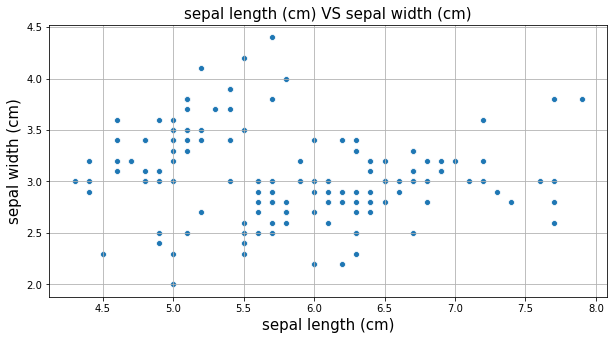

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'])
plt.xlabel('sepal length (cm)',fontsize=15)
plt.ylabel('sepal width (cm)',fontsize=15)
plt.title('sepal length (cm) VS sepal width (cm)',fontsize=15)
plt.grid()
plt.show()

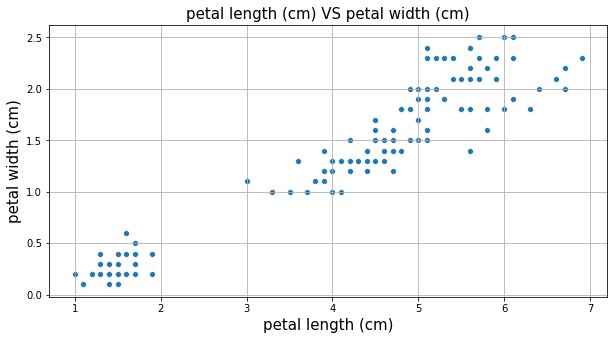

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'])
plt.xlabel('petal length (cm)',fontsize=15)
plt.ylabel('petal width (cm)',fontsize=15)
plt.title('petal length (cm) VS petal width (cm)',fontsize=15)
plt.grid()
plt.show()

##### We can see two separate clusters but not sure about the species.

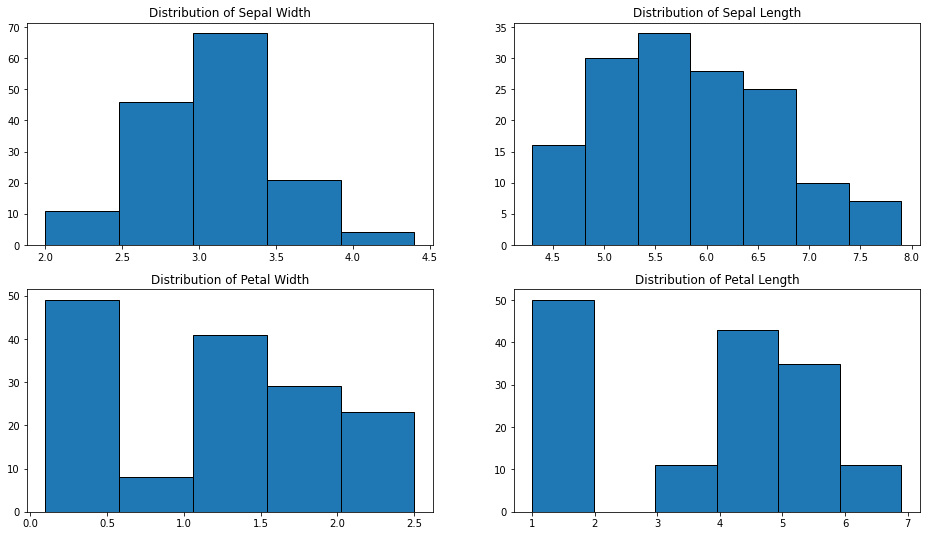

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal width (cm)'], bins=5,ec='black')
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal length (cm)'], bins=7,ec='black')
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal width (cm)'], bins=5,ec='black')
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal length (cm)'], bins=6,ec='black')
plt.show()

##### The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
##### The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
##### The Highest frequency of petal width is between 0 to 0.5 which is around 50.
##### The Highest frequency of petal length is between 0 to 0.5 which is around 50.

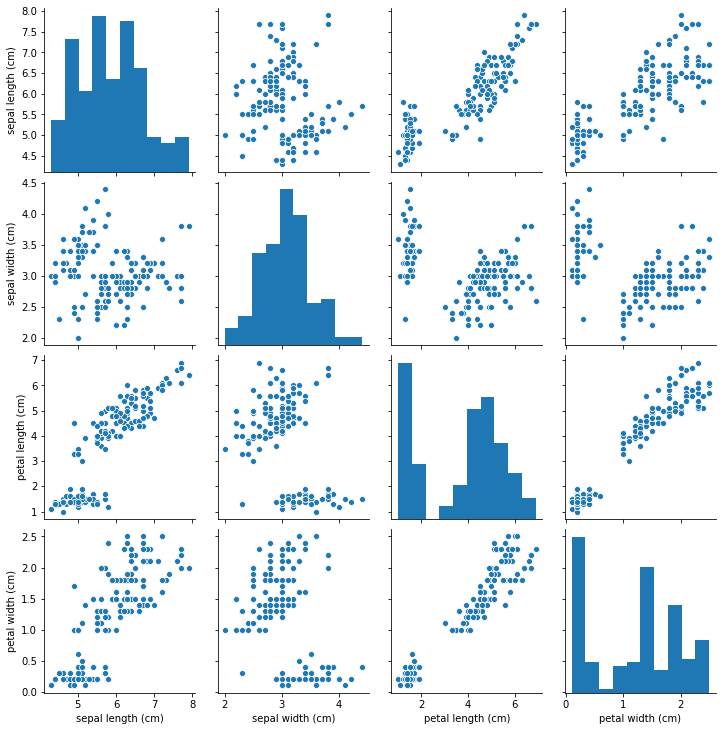

In [11]:
sns.pairplot(df)
plt.show()

## PREPARE DATA

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)

In [13]:
from sklearn.cluster import KMeans

#### finding the optimum number of clusters for K Means? How does one determine the value of K?

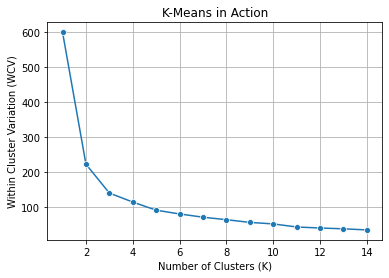

In [14]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcv = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcv.append(km.inertia_)
    
sns.lineplot(range(1, 15), wcv,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Variation (WCV)')
plt.title('K-Means in Action')
plt.grid()
plt.show()

#### In the graph plotted between 'K and 'WCV' , we look for an elbow( the point after which the descent of the graph changes from being exponential to linear. This gives us optimal value of k.

#### From this we can see the number of clusters as 3

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

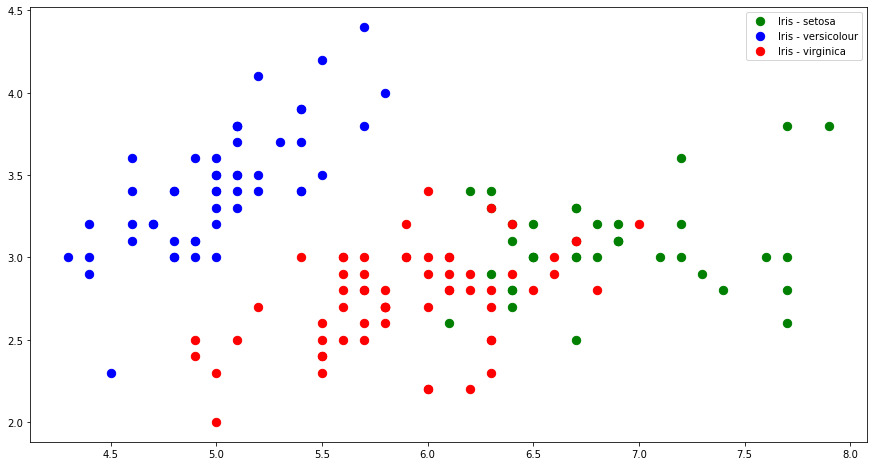

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 70, color = 'green', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 70, color = 'blue', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 70, color = 'red', label = 'Iris - virginica')
plt.legend()
plt.show()

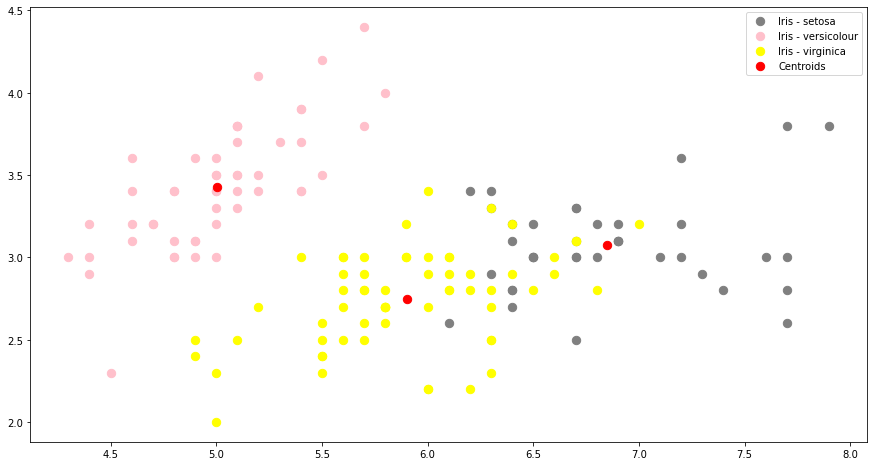

In [17]:
# Plotting centroids of the clusters

plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s = 70, color = 'grey', label = 'Iris - setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 70, color = 'pink', label = 'Iris - versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s = 70, color = 'yellow', label = 'Iris - virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, color = 'red', label = 'Centroids')
plt.legend()
plt.show()